<div align="center"><a href="https://colab.research.google.com/github/deepkapha/EarthScanWebinar/blob/main/notebook/Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

<center><font size="10">Notebook Outline</font></center>

1. **Import Libraries**: In this section, the necessary Python libraries are imported that will be used throughout the notebook.

2. **Gradient Descent**: This is a simple and widely used optimization algorithm that iteratively adjusts the parameters in the direction of steepest descent of the loss function. It requires choosing a learning rate that controls the step size at each iteration.

3. **Adam**: Adam is an adaptive optimization algorithm that uses a combination of gradient information and a moving average of the parameter updates to adjust the learning rate for each parameter. It is well-suited for large datasets and complex models, and often requires less tuning of the learning rate compared to gradient descent.

4. **RMSProp**: RMSProp is another adaptive optimization algorithm that uses a moving average of the squared gradients to adjust the learning rate for each parameter. It is similar to Adam, but does not use a moving average of the parameter updates.

5. **Adamax**: Adamax is a variant of Adam that is designed to work well with very sparse gradients, such as those found in text-based models. It uses the infinity norm to normalize the gradient and the parameter updates, which can lead to improved convergence on sparse data.

# 1. Import the necessaary libraries

In [4]:
from numpy import arange, asarray
import random
from numpy import meshgrid
from matplotlib import pyplot as plt
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

# 2. Gradient Descent Algorithm

The gradient descent algorithm is a popular optimization algorithm used to minimize a given objective function by iteratively adjusting the search position in the direction of steepest descent of the function. The algorithm works by computing the gradient of the objective function at the current search position, and then updating the search position by taking a step in the direction of the negative gradient. This process is repeated until a minimum of the function is found or a predetermined stopping criterion is met.

In this section, we will look at an implementation of the gradient descent algorithm in Python using three functions: `objective`, `derivative`, and `gradient_descent`. The `objective` function computes the value of the objective function at a given point, the `derivative` function computes the gradient of the objective function at a given point, and the `gradient_descent` function implements the gradient descent algorithm using these two functions.

The `objective` function is a simple function that computes the value of the objective function at a given point (x, y). The function takes two arguments, x and y, and returns the value of the objective function evaluated at the point (x, y). This function is used as the objective function in the gradient descent algorithm implemented in `gradient_descent`.

The `derivative` function computes the partial derivatives of the objective function with respect to x and y at a given point (x, y). The function takes two arguments, x and y, and returns a 1D array containing the partial derivatives of the objective function with respect to x and y, respectively. This function is used to compute the gradient of the objective function in the gradient descent algorithm implemented in `gradient_descent`.

The `gradient_descent` function is the main function that implements the gradient descent algorithm. The function takes five arguments: the `objective` function, the `derivative` function, an array of bounds specifying the search space, the number of iterations to run the algorithm, the step size to use when updating the search position, and the momentum to use when updating the search position. The function returns a list of candidate solutions found by the algorithm.

The `gradient_descent` function works by generating an initial point within the specified bounds and evaluating the objective function at that point. It then iteratively computes the gradient of the objective function at the current search position using the `derivative` function, updates the search position using the gradient and the specified step size and momentum, and evaluates the objective function at the new search position. This process is repeated for the specified number of iterations, and the function returns a list of candidate solutions found during the search.


In [6]:
# example of plotting gradient descent with momentum for a one-dimensional function
# objective function
def objective(x, y):
    """
    Compute the value of the objective function at the given point (x, y).

    This function is used as the objective function in the gradient descent algorithm implemented in `gradient_descent`.

    Parameters
    ----------
    x : float
        The x-coordinate of the point at which to evaluate the function.
    y : float
        The y-coordinate of the point at which to evaluate the function.

    Returns
    -------
    float
        The value of the objective function at the point (x, y).
    """
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    """
    Compute the partial derivatives of the objective function with respect to x and y at the given point (x, y).

    This function is used to compute the gradient of the objective function in the gradient descent algorithm implemented in `gradient_descent`.

    Parameters
    ----------
    x : float
        The x-coordinate of the point at which to evaluate the partial derivatives.
    y : float
        The y-coordinate of the point at which to evaluate the partial derivatives.

    Returns
    -------
    ndarray
        A 1D array containing the partial derivatives of the objective function with respect to x and y, respectively.
    """
    return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    """
        Minimize a given objective function using the gradient descent algorithm.

        Parameters
        ----------
        objective : function
            The objective function to minimize.
        derivative : function
            A function that computes the gradient of the objective function.
        bounds : ndarray
            An array of shape (n_dimensions, 2) specifying the lower and upper bounds for each dimension of the search space.
        n_iter : int
            The number of iterations to run the algorithm.
        step_size : float
            The step size to use when updating the search position.
        momentum : float
            The momentum to use when updating the search position.

        Returns
        -------
        list
            A list of candidate solutions found by the algorithm.
    """
	# track all solutions
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
	# keep track of the change
    change = 0.0
	# run the gradient descent
    for t in range(n_iter):
		# calculate gradient
        gradient = derivative(x[0], x[1])
        for i in range(x.shape[0]):
		# calculate update
            new_change = step_size * gradient[i] + momentum * change
            
		# take a step
            x[i] = x[i] - new_change
		# save the change
            change = new_change
		# evaluate candidate point
        
            solution_eval = objective(x[0], x[1])
		# store solution
            solutions.append(x.copy())
            #scores.append(solution_eval)
		# report progress
        print('>%d f(%s) = %.5f' % (t, x, solution_eval))
    return solutions

>0 f([0.74724774 0.01952802]) = 0.55876
>1 f([ 0.57531725 -0.03595673]) = 0.33228
>2 f([ 0.44360837 -0.06827805]) = 0.20145
>3 f([ 0.3451903  -0.08414786]) = 0.12624
>4 f([ 0.2713913  -0.08945799]) = 0.08166
>5 f([ 0.21552    -0.08832778]) = 0.05425
>6 f([ 0.17275506 -0.08349171]) = 0.03682
>7 f([ 0.13965487 -0.07672342]) = 0.02539
>8 f([ 0.11375438 -0.06914888]) = 0.01772
>9 f([ 0.09327587 -0.06146266]) = 0.01248
>10 f([ 0.07692656 -0.05407492]) = 0.00884
>11 f([ 0.06375757 -0.04721063]) = 0.00629
>12 f([ 0.05306534 -0.04097618]) = 0.00449
>13 f([ 0.04432261 -0.03540376]) = 0.00322
>14 f([ 0.03712981 -0.03048085]) = 0.00231
>15 f([ 0.03118073 -0.0261694 ]) = 0.00166
>16 f([ 0.02623801 -0.02241834]) = 0.00119
>17 f([ 0.02211573 -0.01917135]) = 0.00086
>18 f([ 0.01866668 -0.0163718 ]) = 0.00062
>19 f([ 0.01577321 -0.01396548]) = 0.00044
>20 f([ 0.01334046 -0.01190221]) = 0.00032
>21 f([ 0.01129135 -0.0101365 ]) = 0.00023
>22 f([ 0.00956279 -0.00862777]) = 0.00017
>23 f([ 0.00810286 -0.0

#### Performing Gradient Descent Search with Momentum

In this code example, we perform a gradient descent search with momentum using the `gradient_descent` function implemented in the previous section. The search is performed on the `objective` function defined earlier, with the `derivative` function used to compute the gradient of the objective function at each search position.

To perform the search, we first seed the pseudo-random number generator for reproducibility, then define the range for the input variables using the `bounds` array. We also define the total number of iterations to run the search (`n_iter`), the step size to use when updating the search position (`step_size`), and the momentum to use when updating the search position (`momentum`).

We then call the `gradient_descent` function with these parameters, along with the `objective` and `derivative` functions, to perform the search. The function returns a list of candidate solutions found during the search, which we can use to analyze the behavior of the algorithm.

Overall, this code example demonstrates how to use the `gradient_descent` function to perform a gradient descent search with momentum on a given objective function, and shows how the behavior of the algorithm can be controlled using the step size and momentum parameters.

In [ ]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)

# 3. Gradient Descent Algorithm with Adam Optimization
In this code, we're implementing the Adam optimization algorithm for gradient descent. This algorithm is an extension of the standard gradient descent algorithm that includes two additional momentum terms, known as first and second moments, to better adapt the learning rate based on the magnitude of the gradients.

The `objective` function being minimized is defined by the `objective()` function, which takes in two variables x and y and returns their squared sum. 

The `derivative` function calculates the gradient of the `objective` function at any given point x and y, and returns a 2D array of the partial derivatives with respect to x and y.

To start, the algorithm generates an initial point randomly within the bounds defined by the bounds parameter. The `n_iter` parameter specifies the number of iterations the algorithm will run for. The `alpha`, `beta1`, `beta2`, and `eps` parameters are hyperparameters that control the step size, first and second momentum decay rates, and a small value added to the denominator to avoid division by zero.

During each iteration, the gradient g is calculated using the `derivative()` function. The first and second moments m and v are then updated using the current gradient and the hyperparameters. The updated moments are used to calculate new "momentum-corrected" estimates of the gradient mhat and vhat, which are then used to update the point x along the gradient direction. The process repeats until the specified number of iterations is reached.

The solutions list stores the updated points x and their corresponding scores, which are printed out during each iteration to track the progress of the algorithm. The final list of solutions is returned at the end of the algorithm.

>0 f([-0.14595599  0.44064899]) = 0.21547
>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.42064899]) = 0.19286
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.40070573]) = 0.17194
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3808601 ]) = 0.15275
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.3611548 ]) = 0.13526
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.34163405]) = 0.11944
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.32234308]) = 0.10522
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.30332769]) = 0.09248
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.28463383]) = 0.08109
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.26630707]) = 0.07092
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.24839209]) = 0.06182
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.23093228]) = 0.05364
>11 f([0.01759677 0.2139692 ]) = 0.04609


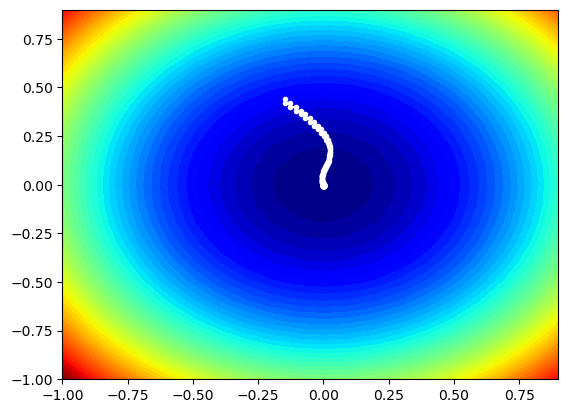

In [6]:
# gradient descent optimization with adam for a two-dimensional test function

 
# objective function
def objective(x, y):
    """
    Objective function to be optimized using gradient descent with ADAM optimizer.

    Parameters:
    -----------
    x: float
        The input value for the x-coordinate.
    y: float
        The input value for the y-coordinate.

    Returns:
    --------
    float:
        The output value of the objective function for the given input values.
    """
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    """
    Gradient of the objective function with respect to the input values x and y.

    Parameters:
    -----------
    x: float
        The input value for the x-coordinate.
    y: float
        The input value for the y-coordinate.

    Returns:
    --------
    numpy.ndarray:
        A numpy array with two elements representing the partial derivatives of the objective
        function with respect to x and y, respectively.
    """
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    """
    Gradient descent optimization with Adam optimizer.

    Parameters:
    -----------
    objective: function
        The objective function to be optimized.
    derivative: function
        The derivative function of the objective function.
    bounds: numpy.ndarray
        A numpy array with shape (2, 2) representing the bounds for the input variables.
        Each row corresponds to one of the input variables, with the first column giving the
        lower bound and the second column giving the upper bound.
    n_iter: int
        The number of iterations for which to run the optimization algorithm.
    alpha: float
        The learning rate or step size parameter for the optimization algorithm.
    beta1: float
        The weighting factor for the moving average of the gradient in the Adam optimizer.
    beta2: float
        The weighting factor for the moving average of the squared gradient in the Adam optimizer.
    eps: float, optional
        A small constant value to prevent division by zero.

    Returns:
    --------
    list:
        A list of numpy arrays, where each array represents the input values for a candidate
        solution found during the optimization process.
    """
 # generate an initial point
    solutions = list()
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
 # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent updates
    for t in range(n_iter):
 # calculate gradient g(t)
        g = derivative(x[0], x[1])
     # build a solution one variable at a time
        for i in range(x.shape[0]):
         # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
         # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
         # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
         # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
         # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
         # evaluate candidate point
            score = objective(x[0], x[1])
            solutions.append(x.copy())
         # report progress
            print('>%d f(%s) = %.5f' % (t, x, score))
    return solutions

We begin by setting the seed for the pseudo-random number generator to ensure reproducibility of the results. We define the range of inputs for our `objective` function, which is a two-dimensional function.

Next, we define the number of iterations, step size, and factors for average gradient and average squared gradient. These values are used to perform the gradient descent search with Adam optimization. The `adam()` function takes in the `objective()` and `derivative()` functions, bounds, number of iterations, step size, and the factors for average gradient and average squared gradient.

Once the search is complete, the best solution and its corresponding score are printed. We then plot the contour plot of the objective function with 50 levels and a jet color scheme. The sample points are plotted as black circles, and the path of the optimization algorithm is plotted as a white line connecting the points. Finally, we display the plot using plt.show().

In [ ]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
#print('f(%s) = %f' % (best, score))
# plot the sample as black circles
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
plt.show()

# 4. Gradient Descent Algorithm with RMSprop Optimization
In this code, we're implementing the RMSprop optimization algorithm for gradient descent. This algorithm is an adaptive learning rate method that adjusts the step size of the gradients based on the magnitude of recent gradients.

The `objective` function being minimized is defined by the `objective()` function, which takes in two variables x and y and returns their squared sum.

The `derivative` function calculates the gradient of the objective function at any given point x and y, and returns a 2D array of the partial derivatives with respect to x and y.

To start, the algorithm generates an initial point randomly within the bounds defined by the bounds parameter. The `n_iter` parameter specifies the number of iterations the algorithm will run for. The `alpha` and `eps` parameters are hyperparameters that control the step size and a small value added to the denominator to avoid division by zero.

During each iteration, the gradient `g` is calculated using the `derivative()` function. The gradient is then squared and a running average of the squared gradients is maintained using the current and previous gradients, decayed by the hyperparameter `alpha`. The updated running average is used to normalize the gradient, which is then used to update the point x along the gradient direction. The process repeats until the specified number of iterations is reached.

The solutions list stores the updated points x and their corresponding scores, which are printed out during each iteration to track the progress of the algorithm. The final list of solutions is returned at the end of the algorithm.

>0 f([-0.26595598  0.340649  ]) = 0.18677
>1 f([-0.23684411  0.36976087]) = 0.19282
>2 f([-0.2239809   0.38262408]) = 0.19657
>3 f([-0.21633271  0.39027227]) = 0.19911
>4 f([-0.2111268   0.39547818]) = 0.20098
>5 f([-0.20729389  0.39931109]) = 0.20242
>6 f([-0.20432268  0.4022823 ]) = 0.20358
>7 f([-0.20193389  0.40467109]) = 0.20454
>8 f([-0.1999604   0.40664458]) = 0.20534
>9 f([-0.19829527  0.40830971]) = 0.20604
>10 f([-0.19686649  0.40973849]) = 0.20664
>11 f([-0.19562356  0.41098142]) = 0.20717
>12 f([-0.19452987  0.41207511]) = 0.20765
>13 f([-0.19355817  0.41304681]) = 0.20807
>14 f([-0.19268769  0.41391729]) = 0.20846
>15 f([-0.19190227  0.41470271]) = 0.20880
>16 f([-0.19118915  0.41541583]) = 0.20912
>17 f([-0.19053809  0.41606688]) = 0.20942
>18 f([-0.18994078  0.4166642 ]) = 0.20969
>19 f([-0.18939036  0.41721462]) = 0.20994
>20 f([-0.18888115  0.41772383]) = 0.21017
>21 f([-0.18840838  0.41819659]) = 0.21039
>22 f([-0.18796802  0.41863695]) = 0.21059
>23 f([-0.18755664  0

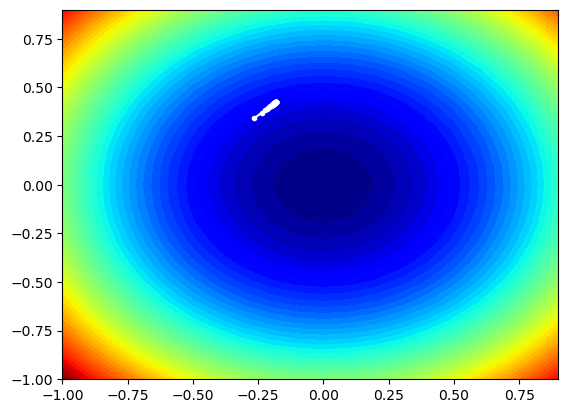

In [7]:
# example of plotting the rmsprop search on a contour plot of the test function
# objective function
def objective(x, y):
    """
    Returns the value of the objective function at the given input point (x, y).
    
    Parameters:
    x (float): The x-coordinate of the input point.
    y (float): The y-coordinate of the input point.
    
    Returns:
    float: The value of the objective function at the input point.
    """
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    """
    Returns the gradient of the objective function at the given input point (x, y).
    
    Parameters:
    x (float): The x-coordinate of the input point.
    y (float): The y-coordinate of the input point.
    
    Returns:
    numpy.ndarray: The gradient of the objective function at the input point, as a 2-element NumPy array.
    """
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    """
    Performs the gradient descent optimization algorithm with RMSprop.

    Parameters:
    -----------
    objective : function
        The objective function to be optimized.
    derivative : function
        The derivative of the objective function.
    bounds : array-like
        The lower and upper bounds for each input variable.
    n_iter : int
        The maximum number of iterations to perform the optimization algorithm.
    step_size : float
        The step size for each iteration of the algorithm.
    rho : float
        The forgetting factor for the moving average of the squared gradient.

    Returns:
    --------
    solutions : list of arrays
        The sequence of candidate solutions generated by the optimization algorithm.
    """
 # track all solutions
    solutions = list()
     # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
 # list of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent
    for it in range(n_iter):
 # calculate gradient
        gradient = derivative(x[0], x[1])
 # update the average of the squared partial derivatives
        for j in range(gradient.shape[0]):
 # calculate the squared gradient
            sg = gradient[j]**2.0
 # update the moving average of the squared gradient
            sq_grad_avg[j] = (sq_grad_avg[j] * rho) + (sg * (1.0-rho))# build solution
            new_solution = list()
            for i in range(x.shape[0]):# calculate the learning rate for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_avg[j]))
 # calculate the new position in this variable
                value = x[i] - alpha * gradient[j]
                new_solution.append(value)# store the new solution
                solution = asarray(new_solution)
        solutions.append(solution)
 # evaluate candidate point
        solution_eval = objective(solution[0], solution[1])# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions

This code performs a gradient descent search with RMSprop optimization to minimize an objective function defined by the objective function and its derivative function, derivative. The range of input values is defined by the bounds array, and the number of iterations is defined by `n_iter`. The step size for each iteration is defined by `step_size`, and the momentum for RMSprop is defined by `rho`.

The code then generates a uniform sample of points within the input range and computes the corresponding target values for the objective function. It creates a filled contour plot of the target values using a color scheme called "jet" with 50 levels. The sample points that were generated during the optimization process are plotted as white circles on the contour plot.

Finally, the plot is displayed using `pyplot.show()`.

In [ ]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

# 5. Gradient Descent Algorithm with Adamax Optimization
In this code, we're implementing the Adamax optimization algorithm for gradient descent. This algorithm is similar to Adam but replaces the second moment with the weighted infinity norm to better adapt the learning rate based on the magnitude of the gradients.

The `objective` function being minimized is defined by the `objective()` function, which takes in two variables x and y and returns their squared sum.

The `derivative` function calculates the gradient of the `objective` function at any given point x and y, and returns a 2D array of the partial derivatives with respect to x and y.

To start, the algorithm generates an initial point randomly within the bounds defined by the bounds parameter. The `n_iter` parameter specifies the number of iterations the algorithm will run for. The `alpha`, `beta1`, and `beta2` parameters are hyperparameters that control the step size, first and second moment decay rates.

During each iteration, the gradient `g` is calculated using the `derivative()` function. The first moment m and weighted infinity norm u are then updated using the current gradient and the hyperparameters. The updated moment and norm are used to calculate a "momentum-corrected" estimate of the gradient delta, which is then used to update the point x along the gradient direction. The process repeats until the specified number of iterations is reached.

The solutions list stores the updated points x and their corresponding scores, which are printed out during each iteration to track the progress of the algorithm. The final list of solutions is returned at the end of the algorithm.

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12710654  0.40095637]) = 0.17692
>2 f([-0.10946453  0.38160729]) = 0.15761
>3 f([-0.09307535  0.36263664]) = 0.14017
>4 f([-0.07797164  0.34407763]) = 0.12447
>5 f([-0.06417238  0.32596131]) = 0.11037
>6 f([-0.0516824   0.30831621]) = 0.09773
>7 f([-0.04049225  0.2911681 ]) = 0.08642
>8 f([-0.03057849  0.27453966]) = 0.07631
>9 f([-0.02190445  0.25845039]) = 0.06728
>10 f([-0.01442115  0.2429165 ]) = 0.05922
>11 f([-0.00806872  0.22795085]) = 0.05203
>12 f([-0.00277794  0.21356301]) = 0.04562
>13 f([0.00152809 0.19975935]) = 0.03991
>14 f([0.00493204 0.18654317]) = 0.03482
>15 f([0.00752057 0.17391486]) = 0.03030
>16 f([0.00938247 0.16187209]) = 0.02629
>17 f([0.01060693 0.15041003]) = 0.02274
>18 f([0.01128195 0.1395216 ]) = 0.01959
>19 f([0.01149284 0.12919765]) = 0.01682
>20 f([0.01132104 0.11942723]) = 0.01439
>21 f([0.01084297 0.11019782]) = 0.01226
>22 f([0.01012927 0.10149551]) = 0.01040
>23 f([0.00924413 0.09330524]) = 0.00879


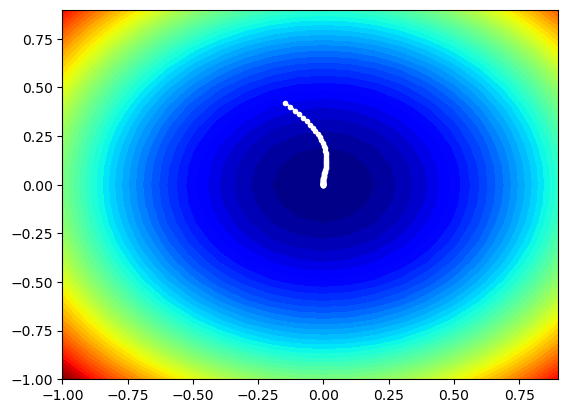

In [8]:
# example of plotting the adamax search on a contour plot of the test function
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with adamax
def adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
	solutions = list()
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# initialize moment vector and weighted infinity norm
	m = [0.0 for _ in range(bounds.shape[0])]
	u = [0.0 for _ in range(bounds.shape[0])]
	# run iterations of gradient descent
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(x.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# u(t) = max(beta2 * u(t-1), abs(g(t)))
			u[i] = max(beta2 * u[i], abs(g[i]))
			# step_size(t) = alpha / (1 - beta1(t))
			step_size = alpha / (1.0 - beta1**(t+1))
			# delta(t) = m(t) / u(t)
			delta = m[i] / u[i]
			# x(t) = x(t-1) - step_size(t) * delta(t)
			x[i] = x[i] - step_size * delta
		# evaluate candidate point
		score = objective(x[0], x[1])
		solutions.append(x.copy())
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions

This code section performs a gradient descent search with Adamax optimization algorithm for a given objective function and its derivative. The input range is defined by a set of bounds, and the search is performed for a total of 60 iterations with a step size of 0.02. The factors for the average gradient and average squared gradient are set to 0.8 and 0.99, respectively.

A contour plot of the objective function is created using the contourf function from the pyplot module of the matplotlib library. The input range is sampled uniformly at 0.1 increments, and a mesh is created from the resulting axis. The filled contour plot has 50 levels and uses the 'jet' color scheme.

The resulting solutions of the gradient descent search are plotted as black circles on the contour plot using the plot function from pyplot. The plot is displayed using the show function.

In [ ]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.99
# perform the gradient descent search with adamax
solutions = adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()